In [1]:
%matplotlib inline
import yaml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import ceil

## Set the plotting parameters

In [2]:
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['font.size'] = 22
mpl.rcParams['axes.color_cycle'] = ['#f79321', '#285fa7', '#215D74']

## Set up for reading data from yaml files

In [3]:
def yaml_loader(filepath):
    """Reads in yaml files"""
    with open(filepath,"r") as file_descriptor:
        data = yaml.load(file_descriptor)
    return data

def load_property(dictionary,prop):
    """Extracts a particular property from the disctionary and returns as a list"""
    new_list = []
    for i in range(len(dictionary['thermal_properties'])):
        new_list.append(dictionary['thermal_properties'][i][prop])
    return new_list

def load_frequencies(dictionary):
    """Extracts a particular property from the disctionary and returns as a list"""
    new_list = []
    for i in range(len(data['phonon'])):
        for j in range(len(data['phonon'][i]['band'])):
            new_list.append(float(data['phonon'][i]['band'][j]['frequency']))
    return new_list

def load_weights(dictionary):
    """Extracts a particular property from the disctionary and returns as a list"""
    new_list = []
    for i in range(len(data['phonon'])):
        for j in range(len(data['phonon'][i]['band'])):
            new_list.append(float(data['phonon'][i]['weight']))
    return new_list

## Load the various thermal properties as obtained from PHONOPY

In [4]:
formate_data = yaml_loader('OrganicAB/Zn_P2121_thermal_properties.yaml')
p21_formate_entropies = load_property(formate_data,'entropy')
p21_formate_temperatures = load_property(formate_data,'temperature')
formate_data = yaml_loader('OrganicAB/Zn_Pna21_thermal_properties.yaml')
pna_formate_entropies = load_property(formate_data,'entropy')
pna_formate_temperatures = load_property(formate_data,'temperature')
pna_formate_entropies = [ a/4 for a in pna_formate_entropies ]
p21_formate_entropies = [ a/4 for a in p21_formate_entropies ]

In [5]:
fto_data = yaml_loader('STO/SrTiO3_cubic.yaml')
cubic_fto_entropies = load_property(fto_data,'entropy')
cubic_fto_temperatures = load_property(fto_data,'temperature')
fto_data = yaml_loader('STO/SrTiO3_tet.yaml')
hex_fto_entropies = load_property(fto_data,'entropy')
hex_fto_temperatures = load_property(fto_data,'temperature')
hex_fto_entropies = [ a/6 for a in hex_fto_entropies ]

In [6]:
hydride_data = yaml_loader('OrganicB/Cubic_thermal_properties.yaml')
cubic_hydride_entropies = load_property(hydride_data,'entropy')
cubic_hydride_temperatures = load_property(hydride_data,'temperature')
hydride_data = yaml_loader('OrganicB/Hexagonal_thermal_properties.yaml')
ilm_hydride_entropies = load_property(hydride_data,'entropy')
ilm_hydride_temperatures = load_property(hydride_data,'temperature')
ilm_hydride_entropies = [a/6 for a in ilm_hydride_entropies]

IOError: [Errno 2] No such file or directory: 'OrganicB/Hexagonal_thermal_properties.yaml'

In [7]:
mapi_data = yaml_loader('OrganicA/Cubic_thermal_properties.yaml')
cubic_mapi_entropies = load_property(mapi_data,'entropy')
cubic_mapi_temperatures = load_property(mapi_data,'temperature')
mapi_data = yaml_loader('OrganicA/Tet_thermal_properties.yaml')
tet_mapi_entropies = load_property(mapi_data,'entropy')
tet_mapi_temperatures = load_property(mapi_data,'temperature')
tet_mapi_entropies = [ a/4 for a in tet_mapi_entropies ]

## Plot entropies as a function of temperature

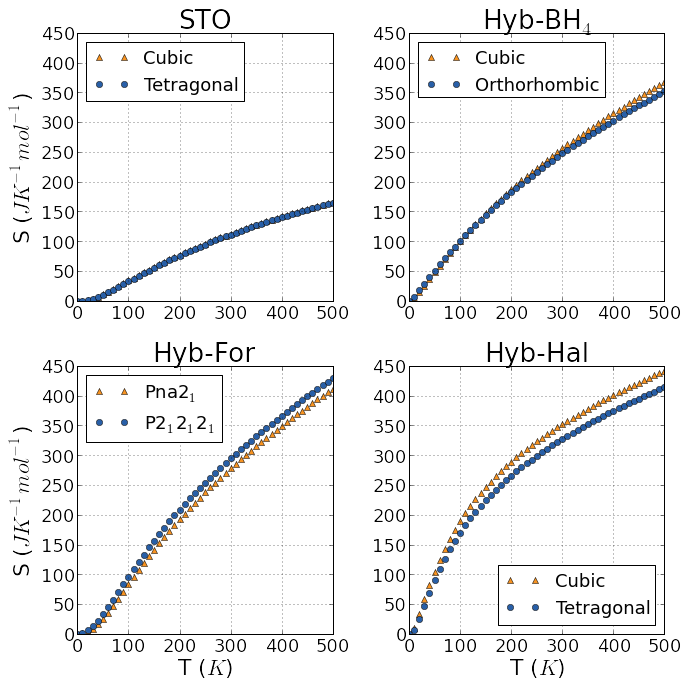

In [8]:
f, ax = plt.subplots(2, 2, sharex=False)
f.set_size_inches(10,10)

marker = 6

ax[0,0].set_title('STO')
ax[0,0].plot(cubic_fto_temperatures,cubic_fto_entropies,'^',markersize=marker,label='Cubic')
ax[0,0].plot(hex_fto_temperatures,hex_fto_entropies,'o',markersize=marker,label='Tetragonal',alpha=1)
ax[0,0].grid(True)
ax[0,0].set_xlim(0,500)
ax[0,0].set_ylim(0,450)
ax[0,0].set_ylabel('S ($J K^{-1} mol^{-1}$)')
ax[0,0].legend(loc='upper left',prop={'size':18})

ax[0,1].set_title('Hyb-BH$_4$')
ax[0,1].plot(cubic_hydride_temperatures,cubic_hydride_entropies,'^',markersize=marker,label='Cubic')
ax[0,1].plot(ilm_hydride_temperatures,ilm_hydride_entropies,'o',markersize=marker,alpha=1,label='Orthorhombic')

ax[0,1].grid(True)
ax[0,1].set_xlim(0,500)
ax[0,1].set_ylim(0,450)
ax[0,1].legend(loc='upper left',prop={'size':18})

ax[1,1].set_title('Hyb-Hal')
ax[1,1].plot(cubic_mapi_temperatures,cubic_mapi_entropies,'^',markersize=marker,label='Cubic')
ax[1,1].plot(tet_mapi_temperatures,tet_mapi_entropies,'o',markersize=marker,alpha=1,label='Tetragonal')
ax[1,1].grid(True)
ax[1,1].set_xlim(0,500)
ax[1,1].set_ylim(0,450)
ax[1,0].set_ylabel('S ($J K^{-1} mol^{-1}$)')
ax[1,1].set_xlabel('T ($K$)')
ax[1,1].legend(loc='lower right',prop={'size':18})

ax[1,0].set_title('Hyb-For')
ax[1,0].plot(pna_formate_temperatures,pna_formate_entropies,'^',markersize=marker,label='Pna2$_1$')
ax[1,0].plot(p21_formate_temperatures,p21_formate_entropies,'o',markersize=marker,alpha=1,label='P2$_1$2$_1$2$_1$')
ax[1,0].grid(True)
ax[1,0].set_xlim(0,500)
ax[1,0].set_ylim(0,450)
ax[1,0].set_xlabel('T ($K$)')
ax[1,0].legend(loc='upper left',prop={'size':18})

plt.tight_layout()
plt.savefig('Entropies_temperature.png')

## Routine to read in p-DOS phonon files

In [8]:
def read_pdos(filename):
    f = open(filename)
    data = f.readlines()
    phonons = []
    for datum in data:
        inp = datum.split()
        inp = [ float(i) for i in inp ]
        phonons.append(inp)
    return np.asarray(phonons)

## Read in the various p-DOS

In [9]:
pna21_dos = read_pdos('OrganicAB/partial_DOS_ZnPna.dat')
pna21_a_site = [ sum(phonon[49:77]/6) for phonon in pna21_dos ]
pna21_b_site = [ sum(phonon[77:81]/6) for phonon in pna21_dos ]
pna21_c_site = [ sum(phonon[1:49]/6) for phonon in pna21_dos ]
pna21_t_dos = np.zeros(shape=(len(pna21_a_site),1))
for i in range(len(pna21_a_site)):
    pna21_t_dos[i] = pna21_a_site[i] + pna21_b_site[i] + pna21_c_site[i]
pna21_phonon_energies = [ phonon[0] * 0.004 for phonon in pna21_dos ] # 0.004 == THz -> eV

p21_dos = read_pdos('OrganicAB/partial_DOS_ZNP21.dat')
p21_a_site = [ sum(phonon[49:77]/6) for phonon in p21_dos ]
p21_b_site = [ sum(phonon[77:81]/6) for phonon in p21_dos ]
p21_c_site = [ sum(phonon[1:49]/6) for phonon in p21_dos ]
p21_t_dos = np.zeros(shape=(len(p21_a_site),1))
for i in range(len(p21_a_site)):
    p21_t_dos[i] = p21_a_site[i] + p21_b_site[i] + p21_c_site[i]
p21_phonon_energies = [ phonon[0] * 0.004 for phonon in p21_dos ]

In [22]:
cub = read_pdos('OrganicB/partial_cub.dat')
hydride_cub_a_site = [ phonon[1] for phonon in cub ]
hydride_cub_b_site = [ (phonon[2]) for phonon in cub ]
hydride_cub_c_site = [ sum(phonon[3:18]) for phonon in cub ]
hydride_cub_phonon_energies = [ phonon[0] * 0.004 for phonon in cub ] # 0.004 == THz -> eV
hydride_cub_t_dos = np.zeros(shape=(len(hydride_cub_a_site)))
for i in range(len(hydride_cub_a_site)):
    hydride_cub_t_dos[i] = hydride_cub_a_site[i] + hydride_cub_b_site[i] + hydride_cub_c_site[i]

ill = read_pdos('OrganicB/partial_ground.dat')
hydride_hex_a_site = [ sum(phonon[1:5])/6 for phonon in ill ]
hydride_hex_b_site = [ sum(phonon[5:9])/6 for phonon in ill ]
hydride_hex_c_site = [ sum(phonon[9:49])/6 for phonon in ill ]
hydride_hex_phonon_energies = [ phonon[0] * 0.004 for phonon in ill ] # 0.004 == THz -> eV
hydride_hex_t_dos = np.zeros(shape=(len(hydride_hex_a_site)))
for i in range(len(hydride_hex_a_site)):
    hydride_hex_t_dos[i] = hydride_hex_a_site[i] + hydride_hex_b_site[i] + hydride_hex_c_site[i]


In [14]:
cub = read_pdos('OrganicA/partial_cubic.dat')
mapi_cub_a_site = [ sum(phonon[1:9]) for phonon in cub ]
mapi_cub_b_site = [ (phonon[9]) for phonon in cub ]
mapi_cub_c_site = [ sum(phonon[10:13]) for phonon in cub ]
mapi_cub_phonon_energies = [ phonon[0] * 0.004 for phonon in cub ] # 0.004 == THz -> eV
mapi_cub_t_dos = np.zeros(shape=(len(mapi_cub_a_site)))
for i in range(len(mapi_cub_a_site)):
    mapi_cub_t_dos[i] = mapi_cub_a_site[i] + mapi_cub_b_site[i] + mapi_cub_c_site[i]
    
tet = read_pdos('OrganicA/partial_tet.dat')
mapi_tet_a_site = [ sum(phonon[1:33])/4 for phonon in tet ]
mapi_tet_b_site = [ sum(phonon[33:37])/4 for phonon in tet ]
mapi_tet_c_site = [ sum(phonon[37:49])/4 for phonon in tet ]
mapi_tet_phonon_energies = [ phonon[0] * 0.004 for phonon in tet ] # 0.004 == THz -> eV
mapi_tet_t_dos = np.zeros(shape=(len(mapi_tet_a_site),1))
for i in range(len(mapi_tet_a_site)):
    mapi_tet_t_dos[i] = mapi_tet_a_site[i] + mapi_tet_b_site[i] + mapi_tet_c_site[i]

In [16]:
cub = read_pdos('STO/cub_partial.dat')
fto_cub_a_site = [ (phonon[1]) for phonon in cub ]
fto_cub_b_site = [ (phonon[2]) for phonon in cub ]
fto_cub_c_site = [ sum(phonon[3:5]) for phonon in cub ]
fto_cub_phonon_energies = [ phonon[0] * 0.004 for phonon in cub ] # 0.004 == THz -> eV
fto_cub_t_dos = np.zeros(shape=(len(fto_cub_a_site),1))
for i in range(len(fto_cub_a_site)):
    fto_cub_t_dos[i] = fto_cub_a_site[i] + fto_cub_b_site[i] + fto_cub_c_site[i]
    
hexa = read_pdos('STO/tet_partial.dat')
fto_hex_a_site = [ sum(phonon[1:7])/6 for phonon in hexa ]
fto_hex_b_site = [ sum(phonon[7:13])/6 for phonon in hexa ]
fto_hex_c_site = [ sum(phonon[13:31])/6 for phonon in hexa ]
fto_hex_phonon_energies = [ phonon[0] * 0.004 for phonon in hexa ] # 0.004 == THz -> eV
fto_hex_t_dos = np.zeros(shape=(len(fto_hex_a_site),1))
for i in range(len(fto_hex_a_site)):
    fto_hex_t_dos[i] = fto_hex_a_site[i] + fto_hex_b_site[i] + fto_hex_c_site[i]
    

## Read in all frequencies and sum over q,$v$

In [17]:
def read_frequencies(infile):
    with open(infile, 'r') as f:
        lines = f.readlines()
        freq = []
        weights = []
        nweights = []
        for line in lines:
            inp = line.split()
            freq.append(float(inp[0])), weights.append(float(inp[1]))
            nweights.append(float(inp[2]))
        return np.asarray(freq), np.asarray(weights), nweights

def entropy(temp, freqs):
    Kb = 8.61733825681e-05 # Phonopy number
    val = freqs / (2 * Kb * temp)
    return 1. / (2 * temp) * freqs * np.cosh(val) / np.sinh(val) - Kb * np.log(2 * np.sinh(val))

def total_entropy(ener, w, temp=100):
    total = 0
    for i, freq in enumerate(ener):
        total = total + entropy(temp,freq) * w[i] * 96.4853905398 * 1000
    return total
    
def entropy_by_frequency(ener,w,temp=100):
    frequeucy_resolved_entropy = []
    for i, freq in enumerate(ener):
        frequeucy_resolved_entropy.append(entropy(temp,freq) * w[i] * 96.4853905398 * 1000)
        
    return np.asarray(frequeucy_resolved_entropy)

def add_weights(weights,nweights):
    sum_weights = 0
    for i, w in enumerate(weights[0:]):
        if nweights[i] != nweights[i-1]:
            sum_weights = sum_weights + w
    return sum_weights

def entropic_bins(ener,w,limits,nbins,temp=100):
    bins = np.zeros(shape=(nbins,2))
    interval = limits[1]/nbins
    for i, freq in enumerate(ener):
        for j, this_bin in enumerate(bins[:len(bins)]):
            if freq >= interval * j and freq < interval * ( j + 1 ):
                bins[j,1] = bins[j,1] + entropy(temp,freq) * w[i] * 96.4853905398 * 1000
    for j in range(len(bins)):
        bins[j,0] = interval * j
    return bins

def contribution_bins(Energies,A,B,C,dE,limits):
    nbins = ceil((limits[1]-limits[0])/dE)
    bins = np.zeros(shape=(nbins,4))
    for i, ener in enumerate(Energies):
        for j , eg in enumerate(bins):
            if j * dE + limits[0] <= ener < (j + 1) * dE + limits[0]:
                bins[j,0] = bins[j,0] + A[i]
                bins[j,1] = bins[j,1] + B[i]
                bins[j,2] = bins[j,2] + C[i] / 3
                bins[j,3] = bins[j,3] + 1
    
    for i in range(len(bins)):
        total = bins[i,0] + bins[i,1] + bins[i,2]
        if total > 0:
            bins[i,0] = bins[i,0] / total
            bins[i,1] = bins[i,1] / total + bins[i,0]
            bins[i,2] = 1.
        else:
            bins[i,0] = bins[i,1] = bins[i,2] = 0
            
        bins[i,3] = dE * i
        
    return bins

# Temperature at which all analysis is performed

In [18]:
analysis_temp = 300

## Inorganic material cubic/tetragonal

In [19]:
frequencies, weights, nweights = read_frequencies("STO/SrTiO3_cub_freq.dat")
energies =  [ freq / 241.79894459998138 for freq in frequencies ] # Conversion factor from Phonopy
new_energies = []
new_weights = []
new_nweights = []
for i, energy in enumerate(energies):
    if energy > 0:
        new_energies.append(energy)
        new_weights.append(weights[i])
        new_nweights.append(nweights[i])
weights = new_weights
nweights = new_nweights
weight_sum = add_weights(weights,nweights)
inorg_cub_energies = np.asarray(new_energies)
v_ent_cub = entropy_by_frequency(inorg_cub_energies,weights, temp=analysis_temp)
inorg_cubic_bins = entropic_bins(inorg_cub_energies,weights,(0., 0.20),20,temp=analysis_temp)
for i in range(len(inorg_cubic_bins)):
    inorg_cubic_bins[i,1] = inorg_cubic_bins[i,1] / weight_sum

inorg_weight = weight_sum
inorg_weights = new_weights

inorg_cubic_contribs = contribution_bins(fto_cub_phonon_energies,fto_cub_a_site,
                                           fto_cub_b_site,fto_cub_c_site,0.01,[0.,0.2])
    
frequencies, weights, nweights = read_frequencies("STO/SrTiO3_hex_freq.dat")
energies =  [ freq / 241.79894459998138 for freq in frequencies ] # Conversion factor from Phonopy
new_energies = []
new_weights = []
new_nweights = []
for i, energy in enumerate(energies):
    if energy > 0:
        new_energies.append(energy)
        new_weights.append(weights[i])
        new_nweights.append(nweights[i])
weights = new_weights
nweights = new_nweights
weight_sum = add_weights(weights,nweights)
inorg_hex_energies = np.asarray(new_energies)
v_ent_hex = entropy_by_frequency(inorg_hex_energies,weights,temp=analysis_temp)
inorg_hex_bins = entropic_bins(inorg_hex_energies,weights,(0., 0.20),20,temp=analysis_temp)
for i in range(len(inorg_hex_bins)):
    inorg_hex_bins[i,1] = inorg_hex_bins[i,1] / weight_sum

inorg_hex_contribs = contribution_bins(fto_hex_phonon_energies,fto_hex_a_site,
                                           fto_hex_b_site,fto_hex_c_site,0.01,[0.,0.2])

## Hydride material

In [23]:
frequencies, weights, nweights = read_frequencies("OrganicB/hydride_cub_freq.dat")
energies =  [ freq / 241.79894459998138 for freq in frequencies ] # Conversion factor from Phonopy
new_energies = []
new_weights = []
new_nweights = []
for i, energy in enumerate(energies):
    if energy > 0:
        new_energies.append(energy)
        new_weights.append(weights[i])
        new_nweights.append(nweights[i])
weights = new_weights
nweights = new_nweights
weight_sum = add_weights(weights,nweights)
hydride_cub_energies = np.asarray(new_energies)
v_ent_cub = entropy_by_frequency(hydride_cub_energies,weights,temp=analysis_temp) 
v_ent_cub = [ v / weight_sum for v in v_ent_cub ]
hydride_cubic_bins = entropic_bins(hydride_cub_energies,weights,(0., 0.20),20,temp=analysis_temp)
for i in range(len(hydride_cubic_bins)):
    hydride_cubic_bins[i,1] = hydride_cubic_bins[i,1] / weight_sum

hydride_weight = weight_sum    
hydride_weights = new_weights    

hydride_cubic_contribs = contribution_bins(hydride_cub_phonon_energies,hydride_cub_a_site,
                                           hydride_cub_b_site,hydride_cub_c_site,0.01,[0.,0.2])
    
frequencies, weights, nweights = read_frequencies("OrganicB/hydride_ground_freq.dat")
energies =  [ freq / 241.79894459998138 for freq in frequencies ] # Conversion factor from Phonopy
new_energies = []
new_weights = []
new_nweights = []
for i, energy in enumerate(energies):
    if energy > 0:
        new_energies.append(energy)
        new_weights.append(weights[i])
        new_nweights.append(nweights[i])
weights = new_weights
nweights = new_nweights
weight_sum = add_weights(weights,nweights)
hydride_hex_energies = np.asarray(new_energies)
v_ent_hex= entropy_by_frequency(hydride_hex_energies,weights,analysis_temp)
v_ent_hex = [ v / weight_sum * 6 for v in v_ent_hex ]
hydride_hex_bins = entropic_bins(hydride_hex_energies,weights,(0., 0.20),20,temp=analysis_temp)
for i in range(len(hydride_hex_bins)):
    hydride_hex_bins[i,1] = hydride_hex_bins[i,1] / weight_sum
    
hydrid_hex_contribs = contribution_bins(hydride_hex_phonon_energies,hydride_hex_a_site,
                                        hydride_hex_b_site,hydride_hex_c_site,0.01,[0.,0.2])

## Formate material

In [24]:
frequencies, weights, nweights = read_frequencies("OrganicAB/Zn_p21_freq.dat")
energies =  [ freq / 241.79894459998138 for freq in frequencies ] # Conversion factor from Phonopy
new_energies = []
new_weights = []
new_nweights = []
for i, energy in enumerate(energies):
    if energy > 0:
        new_energies.append(energy)
        new_weights.append(weights[i])
        new_nweights.append(nweights[i])
weights = new_weights
nweights = new_nweights
weight_sum = add_weights(weights,nweights)
for_p21_energies = np.asarray(new_energies)
v_ent_p21 = entropy_by_frequency(for_p21_energies,weights,temp=analysis_temp)
v_ent_p21 = [ v / weight_sum for v in v_ent_p21 ]
for_p21_bins = entropic_bins(for_p21_energies,weights,(0., 0.20),20,temp=analysis_temp)
for i in range(len(for_p21_bins)):
    for_p21_bins[i,1] = for_p21_bins[i,1] / weight_sum
  
    
for_p21_contribs = contribution_bins(p21_phonon_energies,p21_a_site,
                                           p21_b_site,p21_c_site,0.01,[0.,0.2])
    
frequencies, weights, nweights = read_frequencies("OrganicAB/Zn_pna_freq.dat")
energies =  [ freq / 241.79894459998138 for freq in frequencies ] # Conversion factor from Phonopy
new_energies = []
new_weights = []
new_nweights = []
for i, energy in enumerate(energies):
    if energy > 0:
        new_energies.append(energy)
        new_weights.append(weights[i])
        new_nweights.append(nweights[i])
weights = new_weights
nweights = new_nweights
weight_sum = add_weights(weights,nweights)
for_pna_energies = np.asarray(new_energies)
v_ent_pna = entropy_by_frequency(for_pna_energies,weights,temp=analysis_temp)
v_ent_pna = [ v / weight_sum * 4 for v in v_ent_pna ]
for_pna_bins = entropic_bins(for_pna_energies,weights,(0., 0.20),20,temp=analysis_temp)
for i in range(len(for_pna_bins)):
    for_pna_bins[i,1] = for_pna_bins[i,1] / weight_sum
    
for_pna21_contribs = contribution_bins(pna21_phonon_energies,pna21_a_site,
                                           pna21_b_site,pna21_c_site,0.01,[0.,0.2])

formate_weight= weight_sum  
formate_weights = new_weights

## MAPI

In [25]:
frequencies, weights, nweights = read_frequencies("OrganicA/MAPI_cub_freq.dat")
energies =  [ freq / 241.79894459998138 for freq in frequencies ] # Conversion factor from Phonopy
new_energies = []
new_weights = []
new_nweights = []
for i, energy in enumerate(energies):
    if energy > 0:
        new_energies.append(energy)
        new_weights.append(weights[i])
        new_nweights.append(nweights[i])
weights = new_weights
nweights = new_nweights
weight_sum = add_weights(weights,nweights)
MAPI_cub_energies = np.asarray(new_energies)
v_ent_cub = entropy_by_frequency(MAPI_cub_energies,weights,temp=analysis_temp)
v_ent_cub = [ v / weight_sum for v in v_ent_cub ]
MAPI_cub_bins = entropic_bins(MAPI_cub_energies,weights,(0., 0.20),20,temp=analysis_temp)
for i in range(len(MAPI_cub_bins)):
    MAPI_cub_bins[i,1] = MAPI_cub_bins[i,1] / weight_sum
    
MAPI_weight = weight_sum
MAPI_weights = new_weights

In [26]:
mapi_cubic_contribs = contribution_bins(mapi_cub_phonon_energies,mapi_cub_a_site,
                                           mapi_cub_b_site,mapi_cub_c_site,0.01,[0.,0.2])

In [27]:
frequencies, weights, nweights = read_frequencies("OrganicA/MAPI_tet_freq.dat")
energies =  [ freq / 241.79894459998138 for freq in frequencies ] # Conversion factor from Phonopy
new_energies = []
new_weights = []
new_nweights = []
for i, energy in enumerate(energies):
    if energy > 0:
        new_energies.append(energy)
        new_weights.append(weights[i])
        new_nweights.append(nweights[i])
weights = new_weights
nweights = new_nweights
weight_sum = add_weights(weights,nweights)
MAPI_tet_energies = np.asarray(new_energies)
v_ent_tet = entropy_by_frequency(MAPI_tet_energies,weights,temp=analysis_temp)
v_ent_tet = [ v / weight_sum * 4 for v in v_ent_tet ]
MAPI_tet_bins = entropic_bins(MAPI_tet_energies,weights,(0., 0.20),20,temp=analysis_temp)
for i in range(len(MAPI_tet_bins)):
    MAPI_tet_bins[i,1] = MAPI_tet_bins[i,1] / weight_sum

In [28]:
mapi_tet_contribs = contribution_bins(mapi_tet_phonon_energies,mapi_tet_a_site,
                                           mapi_tet_b_site,mapi_tet_c_site,0.01,[0.,0.2])

## Plotting

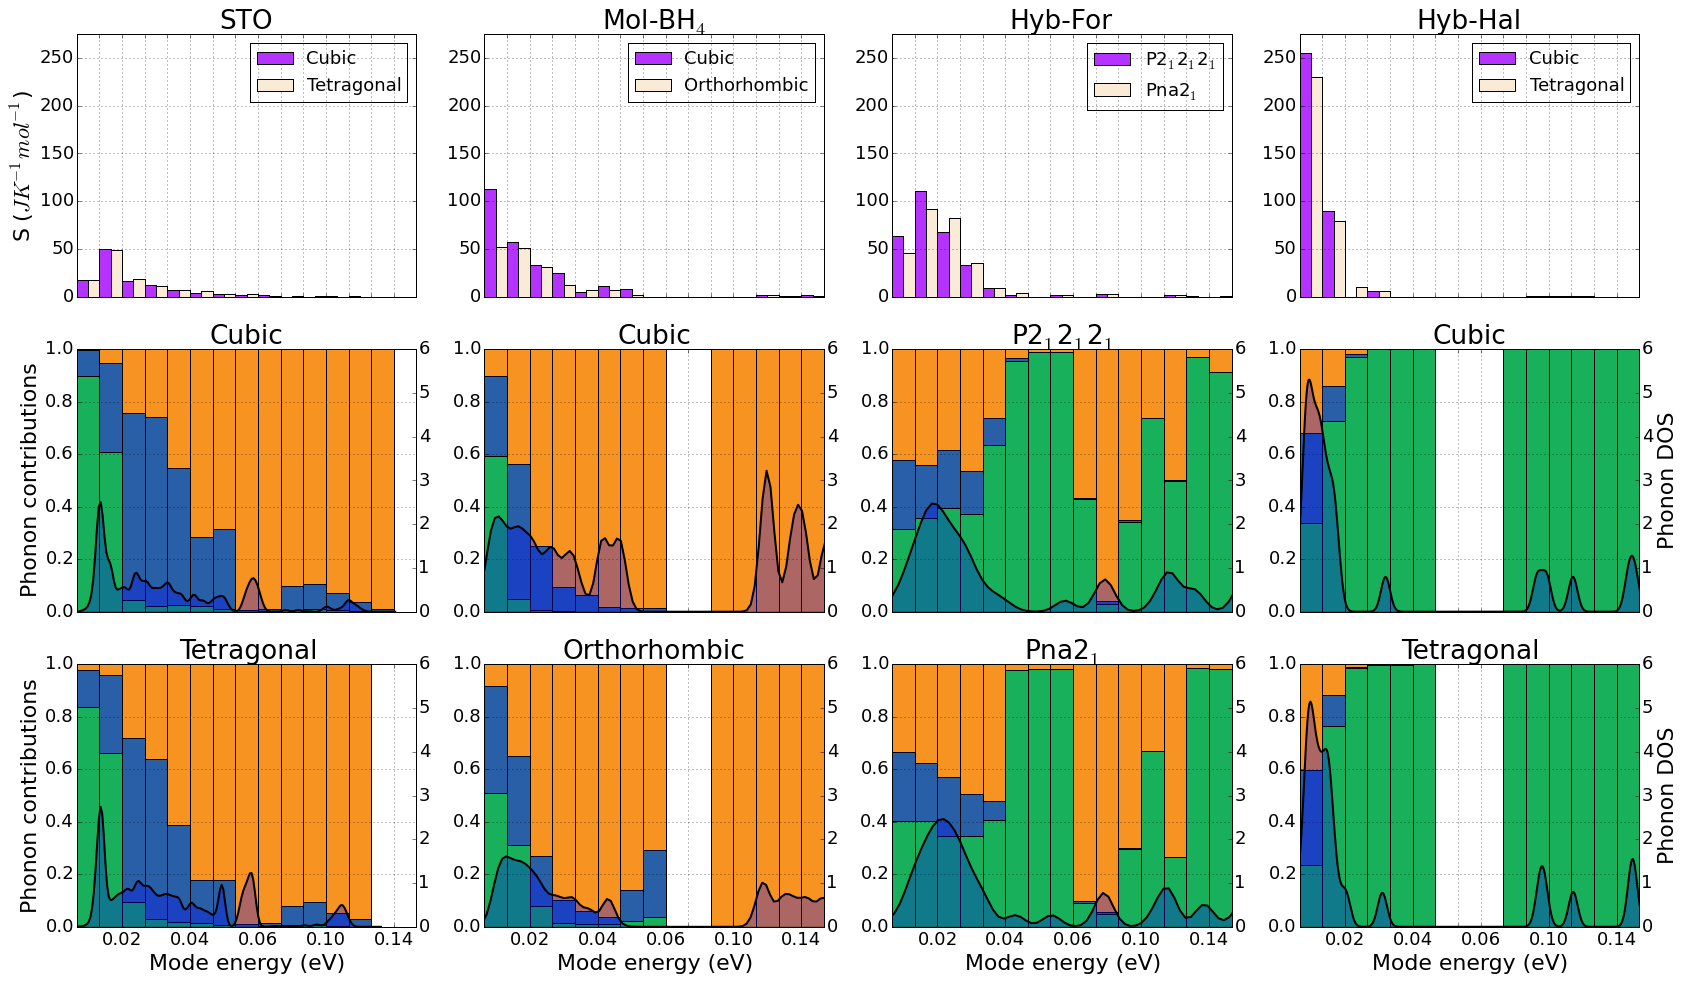

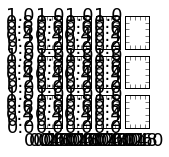

In [34]:
f1, ax = plt.subplots(3, 4, sharex=True)
f2, ax2 = plt.subplots(3, 4, sharex=True)
f1.set_size_inches(28,16)
f2.set_size_inches(2,2)

top_colours = ['#B533FF', '#FAEBD7']
colours = ['#f79321', '#285fa7', '#18b05a']

for i in range(1,3):
    for j in range(4):
        ax2[i,j] = ax[i,j].twinx()
        #ax2[i,j] = ax[i,j].twiny()

xlabels = ['','','0.02','','','0.04','','','0.06','','','0.10','','','0.14']

#######################   INORGANIC
width=0.005
ax[0,0].set_title("STO")
ax[0,0].bar(inorg_cubic_bins[:,0],inorg_cubic_bins[:,1],width=width,color=top_colours[0],label="Cubic")
ax[0,0].bar(inorg_hex_bins[:,0]+width,inorg_hex_bins[:,1]/6,width=width,alpha=1.,color=top_colours[1],label="Tetragonal")
ax[0,0].grid(True)
ax[0,0].set_ylabel('S ($J K^{-1} mol^{-1}$)')
ax[0,0].set_xlim(0,0.15)
ax[0,0].set_ylim(0,275.)
ax[0,0].legend(loc='upper right',prop={'size':18})

w = 0.01
ax[1,0].set_title("Cubic")
ax[1,0].bar(inorg_cubic_contribs[:,3],inorg_cubic_contribs[:,2],width=w,alpha=1,color=colours[0])
ax[1,0].bar(inorg_cubic_contribs[:,3],inorg_cubic_contribs[:,1],width=w,alpha=1,color=colours[1])
ax[1,0].bar(inorg_cubic_contribs[:,3],inorg_cubic_contribs[:,0],width=w,color=colours[2])
ax[1,0].set_ylabel('Phonon contributions')
ax[1,0].grid(True)
ax[1,0].set_xlim(0,0.15)
ax2[1,0].plot(fto_cub_phonon_energies,fto_cub_t_dos,color='black',lw=2)
ax2[1,0].set_ylim(0,6.)
x = [float(f) for f in fto_cub_phonon_energies ]
y = [float(f) for f in fto_cub_t_dos ]
ax2[1,0].fill_between(x,0,y,alpha=0.3)

ax[2,0].set_title("Tetragonal")
ax[2,0].bar(inorg_hex_contribs[:,3],inorg_hex_contribs[:,2],width=w,alpha=1,color=colours[0])
ax[2,0].bar(inorg_hex_contribs[:,3],inorg_hex_contribs[:,1],width=w,alpha=1,color=colours[1])
ax[2,0].bar(inorg_hex_contribs[:,3],inorg_hex_contribs[:,0],width=w,color=colours[2])
ax[2,0].set_xlabel('Mode energy (eV)')
ax[2,0].set_ylabel('Phonon contributions')
ax[2,0].grid(True)
ax[2,0].set_xlim(0,0.15)
ax[2,0].set_xticklabels(xlabels)
ax2[2,0].plot(fto_hex_phonon_energies,fto_hex_t_dos,color='black',lw=2)
ax2[2,0].set_ylim(0,6.)
x = [float(f) for f in fto_hex_phonon_energies ]
y = [float(f) for f in fto_hex_t_dos ]
ax2[2,0].fill_between(x,0,y,alpha=0.3)

########################   HYDRIDE
width=0.005
ax[0,1].set_title("Mol-BH$_4$")
ax[0,1].bar(hydride_cubic_bins[:,0],hydride_cubic_bins[:,1],width=width,color=top_colours[0],label="Cubic")
ax[0,1].bar(hydride_hex_bins[:,0]+width,hydride_hex_bins[:,1]/6,width=width,alpha=1.,color=top_colours[1],label="Orthorhombic")
ax[0,1].grid(True)
ax[0,1].set_ylim(0,275.)
ax[0,1].legend(loc='upper right',prop={'size':18})
ax[0,1].set_xlim(0,0.15)
w = 0.01

ax[1,1].set_title("Cubic")
ax[1,1].bar(hydride_cubic_contribs[:,3],hydride_cubic_contribs[:,2],width=w,alpha=1.,color=colours[0])
ax[1,1].bar(hydride_cubic_contribs[:,3],hydride_cubic_contribs[:,1],width=w,alpha=1.,color=colours[1])
ax[1,1].bar(hydride_cubic_contribs[:,3],hydride_cubic_contribs[:,0],width=w,color=colours[2])
ax[1,1].grid(True)
ax[1,1].set_xlim(0,0.15)
ax[1,1].set_xticklabels(xlabels)
ax2[1,1].plot(hydride_cub_phonon_energies,hydride_cub_t_dos,color='black',lw=2)
ax2[1,1].set_ylim(0,6.)
x = [float(f) for f in hydride_cub_phonon_energies ]
y = [float(f) for f in hydride_cub_t_dos ]
ax2[1,1].fill_between(x,0,y,alpha=0.3)

ax[2,1].set_title("Orthorhombic")
ax[2,1].bar(hydrid_hex_contribs[:,3],hydrid_hex_contribs[:,2],width=w,alpha=1.,color=colours[0])
ax[2,1].bar(hydrid_hex_contribs[:,3],hydrid_hex_contribs[:,1],width=w,alpha=1.,color=colours[1])
ax[2,1].bar(hydrid_hex_contribs[:,3],hydrid_hex_contribs[:,0],width=w,color=colours[2])
ax[2,1].grid(True)
ax[2,1].set_xlim(0,0.15)
ax2[2,1].plot(hydride_hex_phonon_energies,hydride_hex_t_dos,color='black',lw=2)
ax2[2,1].set_ylim(0,6.)
x = [float(f) for f in hydride_hex_phonon_energies ]
y = [float(f) for f in hydride_hex_t_dos ]
ax2[2,1].fill_between(x,0,y,alpha=0.3)
ax[2,1].set_xlabel('Mode energy (eV)')

#######################   FORMATE
width=0.005
ax[0,2].set_title("Hyb-For")
ax[0,2].bar(for_p21_bins[:,0],for_p21_bins[:,1]/4,width=width,color=top_colours[0],label="P2$_1$2$_1$2$_1$")
ax[0,2].bar(for_pna_bins[:,0]+width,for_pna_bins[:,1]/4,width=width,alpha=1.,color=top_colours[1],label="Pna2$_1$")
ax[0,2].grid(True)
ax[0,2].set_xlim(0,0.15)
ax[0,2].set_ylim(0,275.)
ax[0,2].legend(loc='upper right',prop={'size':18})

w = 0.01
ax[1,2].set_title("P2$_1$2$_1$2$_1$")
ax[1,2].bar(for_p21_contribs[:,3],for_p21_contribs[:,2],width=w,alpha=1.,color=colours[0])
ax[1,2].bar(for_p21_contribs[:,3],for_p21_contribs[:,1],width=w,alpha=1.,color=colours[1])
ax[1,2].bar(for_p21_contribs[:,3],for_p21_contribs[:,0],width=w,color=colours[2])
ax[1,2].grid(True)
ax[1,2].set_xlim(0,0.15)
ax2[1,2].set_ylim(0,6.)
ax2[1,2].plot(p21_phonon_energies,p21_t_dos,color='black',lw=2)
x = [float(f) for f in p21_phonon_energies ]
y = [float(f) for f in p21_t_dos ]
ax2[1,2].fill_between(x,0,y,alpha=0.3)

ax[2,2].set_title("Pna2$_1$")
ax[2,2].bar(for_pna21_contribs[:,3],for_pna21_contribs[:,2],width=w,alpha=1.,color=colours[0])
ax[2,2].bar(for_pna21_contribs[:,3],for_pna21_contribs[:,1],width=w,alpha=1.,color=colours[1])
ax[2,2].bar(for_pna21_contribs[:,3],for_pna21_contribs[:,0],width=w,color=colours[2])
ax[2,2].set_xlabel('Mode energy (eV)')
ax[2,2].grid(True)

ax2[2,2].plot(pna21_phonon_energies,pna21_t_dos,color='black',lw=2)
ax2[2,2].set_ylim(0,6.)
x = [float(f) for f in pna21_phonon_energies ]
y = [float(f) for f in pna21_t_dos ]
ax2[2,2].fill_between(x,0,y,alpha=0.3)

ax[2,2].set_xlim(0,0.15)
ax[2,2].set_xticklabels(xlabels)

#######################   MAPI
width=0.005
ax[0,3].set_title("Hyb-Hal")
ax[0,3].bar(MAPI_cub_bins[:,0],MAPI_cub_bins[:,1],width=width,color=top_colours[0],label="Cubic")
ax[0,3].bar(MAPI_tet_bins[:,0]+width,MAPI_tet_bins[:,1]/4,width=width,alpha=1.,color=top_colours[1],label="Tetragonal")
ax[0,3].grid(True)
ax[0,3].set_xticks(np.arange(0,0.15,0.01))
ax[0,3].set_xlim(0,0.15)
ax[0,3].set_ylim(0,275.)
ax[0,3].legend(loc='upper right',prop={'size':18})

w = 0.01
ax[1,3].set_title("Cubic")
ax[1,3].bar(mapi_cubic_contribs[:,3],mapi_cubic_contribs[:,2],width=w,alpha=1.,color=colours[0])
ax[1,3].bar(mapi_cubic_contribs[:,3],mapi_cubic_contribs[:,1],width=w,alpha=1.,color=colours[1])
ax[1,3].bar(mapi_cubic_contribs[:,3],mapi_cubic_contribs[:,0],width=w,color=colours[2])
ax[1,3].grid(True)
ax[1,3].set_xlim(0,0.15)
ax2[1,3].plot(mapi_cub_phonon_energies,mapi_cub_t_dos,color='black',lw=2)
ax2[1,3].set_ylim(0,6.)
ax2[1,3].set_ylabel('Phonon DOS')
x = [float(f) for f in mapi_cub_phonon_energies]
y = [float(f) for f in mapi_cub_t_dos ]
ax2[1,3].fill_between(x,0,y,alpha=0.3)

ax[2,3].set_title("Tetragonal")
ax[2,3].bar(mapi_tet_contribs[:,3],mapi_tet_contribs[:,2],width=w,alpha=1.,color=colours[0])
ax[2,3].bar(mapi_tet_contribs[:,3],mapi_tet_contribs[:,1],width=w,alpha=1.,color=colours[1])
ax[2,3].bar(mapi_tet_contribs[:,3],mapi_tet_contribs[:,0],width=w,color=colours[2])
ax[2,3].set_xlabel('Mode energy (eV)')
ax[2,3].grid(True)
ax[2,3].set_xlim(0,0.15)
ax[2,3].set_xticklabels(xlabels)
ax2[2,3].plot(mapi_tet_phonon_energies,mapi_tet_t_dos,color='black',lw=2)
ax2[2,3].set_ylim(0,6.)
ax2[2,3].set_ylabel('Phonon DOS')
x = [float(f) for f in mapi_tet_phonon_energies ]
y = [float(f) for f in mapi_tet_t_dos ]
ax2[2,3].fill_between(x,0,y,alpha=0.3)

f1.savefig('Figure3.png')
#plt.tight_layout()

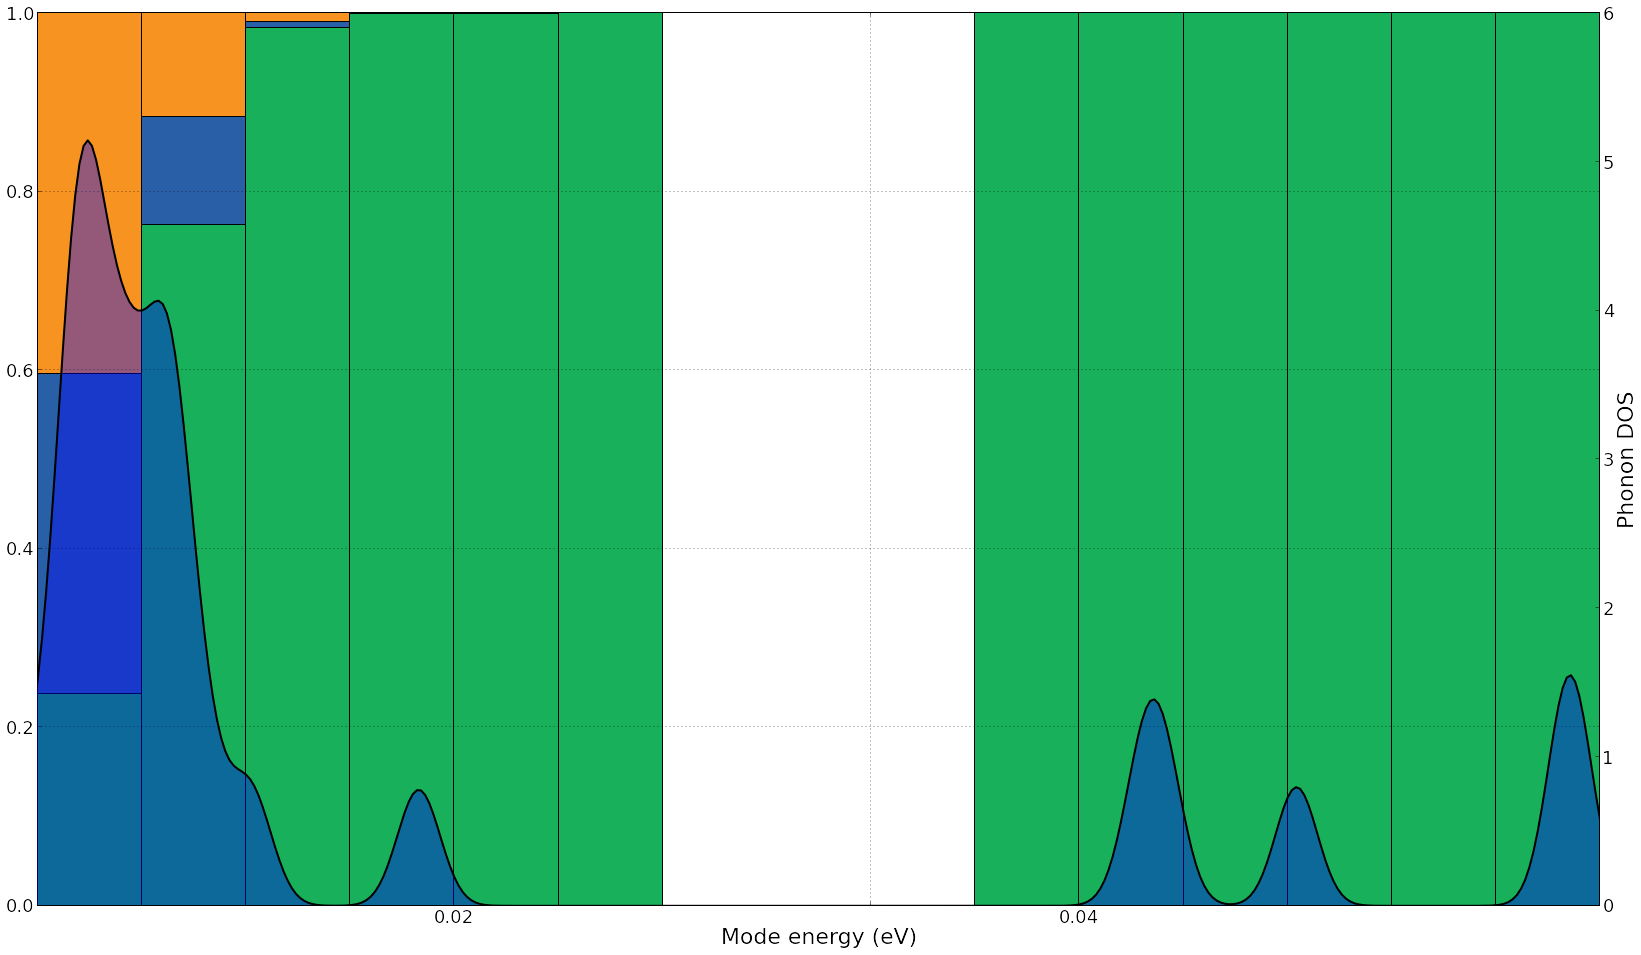

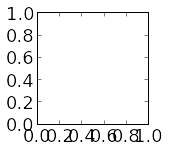

In [25]:
f, ax = plt.subplots(1, 1, sharex=True)
f2, ax2 = plt.subplots(1, 1, sharex=True)
f.set_size_inches(28,16)
f2.set_size_inches(2,2)

ax2 = ax.twinx()

ax.bar(mapi_tet_contribs[:,3],mapi_tet_contribs[:,2],width=w,alpha=1.,color=colours[0])
ax.bar(mapi_tet_contribs[:,3],mapi_tet_contribs[:,1],width=w,alpha=1.,color=colours[1])
ax.bar(mapi_tet_contribs[:,3],mapi_tet_contribs[:,0],width=w,color=colours[2])
ax.set_xlabel('Mode energy (eV)')
ax.grid(True)
ax.set_xlim(0,0.15)
ax.set_xticklabels(xlabels)
zeros = [f*0. for f in mapi_tet_phonon_energies]
x = [float(f) for f in mapi_tet_phonon_energies]
y = [float(f) for f in mapi_tet_t_dos]
ax2.plot(x,y,color='black',lw=2)
ax2.fill_between(x,0, y,alpha=0.4)
ax2.set_ylim(0,6.)
ax2.set_ylabel('Phonon DOS')

## Plot the evolution of entropy contributions with temperature

In [ ]:
f, ax = plt.subplots(2, 2, sharex=False)
f.set_size_inches(10,10)


#mpl.rcParams['axes.color_cycle'] = ['#B52E34', '#94B12D', '#215D74','#AA8339','#8D2F5D','#28794C','#AA5039']
colours = ['#093496', '#009467', '#6DCB00','#E0E000','#E0AE00','#E07800','#E00000']
for j, analysis_temp in enumerate([100, 200, 300, 400, 500, 600, 700]):

    col = colours[j]
    inorg_cubic_bins = entropic_bins(inorg_cub_energies,inorg_weights,(0., 0.20),20,temp=analysis_temp)
    for i in range(len(inorg_cubic_bins)):
        inorg_cubic_bins[i,1] = inorg_cubic_bins[i,1] / inorg_weight
        
    hydride_cubic_bins = entropic_bins(hydride_cub_energies,hydride_weights,(0., 0.20),20,temp=analysis_temp)
    for i in range(len(hydride_cubic_bins)):
        hydride_cubic_bins[i,1] = hydride_cubic_bins[i,1] / hydride_weight
        
    for_pna_bins = entropic_bins(for_pna_energies,formate_weights,(0., 0.20),20,temp=analysis_temp)
    for i in range(len(for_pna_bins)):
        for_pna_bins[i,1] = for_pna_bins[i,1] / formate_weight
    
    MAPI_cub_bins = entropic_bins(MAPI_cub_energies,MAPI_weights,(0., 0.20),20,temp=analysis_temp)
    for i in range(len(MAPI_cub_bins)):
        MAPI_cub_bins[i,1] = MAPI_cub_bins[i,1] / MAPI_weight
  

    ax[0,0].plot(inorg_cubic_bins[:,0],inorg_cubic_bins[:,1],color=col,lw=2.)
    ax[0,0].set_xlim(1e-12,0.2)
    ax[0,0].grid(True)
    ax[0,0].fill_between(inorg_cubic_bins[:,0],0.,inorg_cubic_bins[:,1],facecolor='#3B382E',alpha=0.3)

    ax[0,1].plot(hydride_cubic_bins[:,0],hydride_cubic_bins[:,1],color=col,lw=2., label=(str(analysis_temp) + " K"))
    ax[0,1].set_xlim(1e-12,0.2)
    ax[0,1].grid(True)
    ax[0,1].fill_between(hydride_cubic_bins[:,0],0.,hydride_cubic_bins[:,1],facecolor='#3B382E',alpha=0.3)
    
    #ax[1,0].plot(for_pna_bins[:,0],for_pna_bins[:,1],color=col,lw=2.)
    ax[1,0].plot(for_pna_bins[:,0],for_pna_bins[:,1]/4,color=col,lw=2.)
    ax[1,0].set_xlim(1e-12,0.2)
    ax[1,0].grid(True)
    ax[1,0].fill_between(for_pna_bins[:,0],0.,for_pna_bins[:,1]/4,facecolor='#3B382E',alpha=0.3)

    ax[1,1].plot(MAPI_cub_bins[:,0],MAPI_cub_bins[:,1],color=col,lw=2.)
    ax[1,1].grid(True)
    ax[1,1].set_xlim(1e-12,0.2)
    ax[1,1].fill_between(MAPI_cub_bins[:,0],0.,MAPI_cub_bins[:,1],facecolor='#3B382E',alpha=0.3)
    
ax[0,0].set_title('STO')
ax[0,1].set_title('Hyb-BH$_4$')
ax[1,1].set_title('Hyb-Hal')
ax[1,0].set_title('Hyb-For')
ax[0,0].set_ylabel('S ($J K^{-1} mol^{-1}$)')
ax[1,0].set_ylabel('S ($J K^{-1} mol^{-1}$)')
ax[1,0].set_xlabel('Mode energy (eV)')
ax[1,1].set_xlabel('Mode energy (eV)')

#temps = ['100 K', '200 K', '300, 400, 500, 600, 700]
ax[0,1].legend(loc='upper right',prop={'size':18})
plt.tight_layout()
plt.savefig('Figure2.png')

In [ ]:
f, ax = plt.subplots(3, 2, sharex=False)
f.set_size_inches(12,12)

xlabels = ['','0.2','','0.6','','1.0','','1.4']

width=0.005
ax[0,0].bar(MAPI_cub_bins[:,0],MAPI_cub_bins[:,1],width=width)
ax[0,0].bar(MAPI_tet_bins[:,0]+width,MAPI_tet_bins[:,1]/4,width=width,alpha=1.,color='#ff8833')
ax[0,0].grid(True)
ax[0,0].set_ylabel('Entropy')

ax[0,0].set_xlim(0,0.15)


w = 0.01

ax[1,0].bar(mapi_cubic_contribs[:,3],mapi_cubic_contribs[:,2],width=w,alpha=0.8,color='#666677')
ax[1,0].bar(mapi_cubic_contribs[:,3],mapi_cubic_contribs[:,1],width=w,alpha=0.9,color='#ff8833')
ax[1,0].bar(mapi_cubic_contribs[:,3],mapi_cubic_contribs[:,0],width=w)
ax[1,0].grid(True)
ax[1,0].set_xlim(0,0.15)

ax[2,0].bar(mapi_tet_contribs[:,3],mapi_tet_contribs[:,2],width=w,alpha=0.8,color='#666677')
ax[2,0].bar(mapi_tet_contribs[:,3],mapi_tet_contribs[:,1],width=w,alpha=0.9,color='#ff8833')
ax[2,0].bar(mapi_tet_contribs[:,3],mapi_tet_contribs[:,0],width=w)
ax[2,0].set_xlabel('Mode energy (eV)')
ax[2,0].grid(True)
ax[2,0].set_xlim(0,0.15)

width=0.005
ax[0,1].bar(inorg_cubic_bins[:,0],inorg_cubic_bins[:,1],width=width)
ax[0,1].bar(inorg_hex_bins[:,0]+width,inorg_hex_bins[:,1]/6,width=width,alpha=1.,color='#ff8833')
ax[0,1].grid(True)
ax[0,1].set_ylabel('Entropy')
ax[0,1].set_xlim(0,0.15)

w = 0.01
ax[1,1].bar(inorg_cubic_contribs[:,3],inorg_cubic_contribs[:,2],width=w,alpha=0.8,color='#666677')
ax[1,1].bar(inorg_cubic_contribs[:,3],inorg_cubic_contribs[:,1],width=w,alpha=0.9,color='#ff8833')
ax[1,1].bar(inorg_cubic_contribs[:,3],inorg_cubic_contribs[:,0],width=w)
ax[1,1].grid(True)
ax[1,1].set_xlim(0,0.15)

ax[2,1].bar(inorg_hex_contribs[:,3],inorg_hex_contribs[:,2],width=w,alpha=0.8,color='#666677')
ax[2,1].bar(inorg_hex_contribs[:,3],inorg_hex_contribs[:,1],width=w,alpha=0.9,color='#ff8833')
ax[2,1].bar(inorg_hex_contribs[:,3],inorg_hex_contribs[:,0],width=w)
ax[2,1].set_xlabel('Mode energy (eV)')
ax[2,1].grid(True)
ax[2,1].set_xlim(0,0.15)
ax[2,1].set_xticklabels(xlabels)

In [ ]:
print mapi_tet_contribs